### TSP: Applied Naive Solution

* This notebook will focus on applying the methods in _TSP - Naive Approach_ in a simulated real world scenerio  
* The solution will foocus on one traveling salesman finding the optimal route within the following cities:  
    * Los Angeles
    * Chicago
    * Dallas
    * Austin
    * kansas City
    * Nashville
    * Pheonix

* The distance haversine function will then be applied to each latitude and longitude pair in order to generate a distance cost matrix (graph matrix)  
* Plotly will be integrated to this notebook to get a visual representation of the optimal route  
* A constraint will be introduced as well where the salesman cannot travel from Dallas TX to Austin TX and vice versa

* A reference to plotly geo-spatial plots can be found [here](https://plotly.com/python/maps/)  
* A reference to plotly geo-spatial plots used in this notebook can be found [here](https://plotly.com/python/lines-on-mapbox/)  * To setup a Chart Studio API click [here](https://chart-studio.plotly.com/)

### TSP: Import Dependencies

In [18]:
import numpy as np
from datetime import datetime as dt
import os

import chart_studio
chart_studio.tools.set_credentials_file(username='rangeljrr', api_key='XXXXXXXXX')

# Locations
#cities = ['Los Angeles, CA','Chicago, IL','Dallas, TX','Austin, TX','Kansas City, KS','Nashville, TN','Pheonix, AZ']
geo_locations = {'Los Angeles, CA':[34.052222,-118.242777]
                ,'Chicago, IL':[41.881832,-87.623177]
                ,'Dallas, TX':[32.779167,-96.808891]
                ,'Austin, TX':[30.2671509,-97.7430573]
                ,'Kansas City, KS':[39.106667,-94.676392]
                ,'Nashville, TN':[36.174465,-86.767960]
                ,'Pheonix, AZ':[33.448376,-112.074036]}

"""
Notes:
Example: Los Angeles
Lat: (34° 3′ 8.00″ N) = 34.052222
Lon: (118° 14′ 34.00″ W) = -118.2427778

In this scenerio, Los Angeles will be considered the start & end city
""";


### Function: Haversine Distance

In [19]:
def haversine_distance(lat1, lon1, lat2, lon2, miles = True):
    
    from math import radians, cos, sin, asin, sqrt

    """
    description: This function uses the haversine formula to compute the distance
                 between two points in miles/kilometers
                 For mi use r = 3959.87433
                 For km use r = 6372.80000
    lon1,lat1: Inputs should be the latitude and longitude of the initial location
               in decimal
    lon2,lat2: Inputs should be the latitude and longitude of the final location
               in decimal
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    distance_lon = lon2 - lon1 
    distance_lat = lat2 - lat1 
    a = sin(distance_lat/2)**2 + cos(lat1) * cos(lat2) * sin(distance_lon/2)**2
    c = 2 * asin(sqrt(a)) 
    
    if miles == True:
        r = 3959.87433
    if miles == False:
        r = 6372.80000
    return(c * r)

### Function: Next Permutation 

In [84]:
# Next Permutation
def next_permutation(L): 
    """ 
    Assumption:
    L must be in ascending order
    """
    
    # Find Length 
    n = len(L) 
    
    # Number Iterations
    i = n - 2
    
    # Remove 1 Iteration
    while i >= 0 and L[i] >= L[i + 1]: 
        i -= 1
  
    # Stop when next permutation DNE
    if i == -1: 
        status = False
        return L, status
  
    # Perform Purmuation P_i
    j = i + 1
    while j < n and L[j] > L[i]: 
        j += 1
    j -= 1
    L[i], L[j] = L[j], L[i] 
  
    left = i + 1
    right = n - 1
  
    while left < right: 
        L[left], L[right] = L[right], L[left] 
        left += 1
        right -= 1
        
    status = True
    
    return L, status

### Function: Naive TSP

In [85]:
# Traveling Salesman Problem: Naive Approach 
def tsp(graph,s,V):
    
    # List Of Unique Vertices (Excluding Starting Point)
    vertex = [] 
    for i in range(V): 
        if i != s: 
            vertex.append(i) 
    #print(vertex)
    
    # Store New Min Paths, Cost      
    cost = []
    
    # Initializing Minimum Path
    min_path = 9999999999999999 

    while True: 

        # Store Current Path Cost
        current_pathweight = 0

        # Find Cost Current Path
        k = s 
    
        for i in range(len(vertex)): 
            current_pathweight += graph[k][vertex[i]] 
            k = vertex[i] 

        current_pathweight += graph[k][s] 

        # Store Only If Next Iter = Minimum
        if current_pathweight <= min_path:
            cost.append([vertex.copy(),current_pathweight])
            
            # Update Minimum
            min_path = current_pathweight

        # Next Permutation Cost
        vertex, status = next_permutation(vertex)

        # Break When Next Permutation DNE
        if not status: 
            break
            
    return cost 



### TSP: Distance Cost Matrix

In [86]:
# Create Cost Matrix
cities = list(geo_locations.keys())
M = np.zeros(shape=(len(cities),len(cities)))
for i in range(len(cities)):
    for j in range(len(cities)):
        city_a = geo_locations[cities[i]]
        city_b = geo_locations[cities[j]]
        
        M[i,j] = haversine_distance(city_a[0],city_a[1],city_b[0],city_b[1])
        
# Starting Vertex
s = 0

# Number Vertices
V = len(M[0])

### TSP: Visual

In [87]:
import plotly.graph_objects as go

lat_input = [geo_locations[cities[i]][0] for i in range(len(cities))]
lon_input = [geo_locations[cities[i]][1] for i in range(len(cities))]
us_center = [37.0902, -95.7129]

fig = go.Figure(go.Scattermapbox(
    mode = "markers",
    lat = lat_input,
    lon = lon_input,
    marker = {'size': 15,'color':'red'}))

fig.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'center': {'lat': us_center[0], 'lon': us_center[1]},
        'style': "stamen-terrain",
        'center': {'lat': us_center[0], 'lon': us_center[1]},
        'zoom': 3})

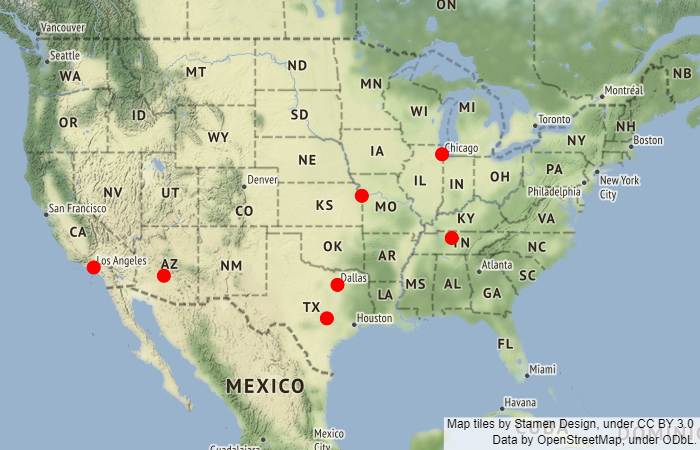

In [99]:
from PIL import Image

Image.open("C:\\Users\\jeng353\\Downloads\\newplot (2).png")

### TSP: Naive Optimization

In [88]:
solutions = tsp(M,s,V)
display(solutions[-1])

"""
Notes:
* The total cost of the optimal route solution is 4189 miles
* Solution: 0 -> 6 -> 3 -> 2 -> 5 -> 1 -> 4 -> 0
* Solution Cost: 4189.405
""";

[[6, 3, 2, 5, 1, 4], 4189.404652084217]

### TSP: Optimal Route

In [89]:
optimal_route = solutions[-1][0].copy()
optimal_route.insert(0,0)
optimal_route.append(0)
opt_lat_input = [geo_locations[cities[i]][0] for i in optimal_route]
opt_lon_input = [geo_locations[cities[i]][1] for i in optimal_route]

fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lat = opt_lat_input,
    lon = opt_lon_input,
    marker = {'size': 15,'color':'red'}))

fig.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'center': {'lat': us_center[0], 'lon': us_center[1]},
        'style': "stamen-terrain",
        'center': {'lat': us_center[0], 'lon': us_center[1]},
        'zoom': 3})

fig.show()

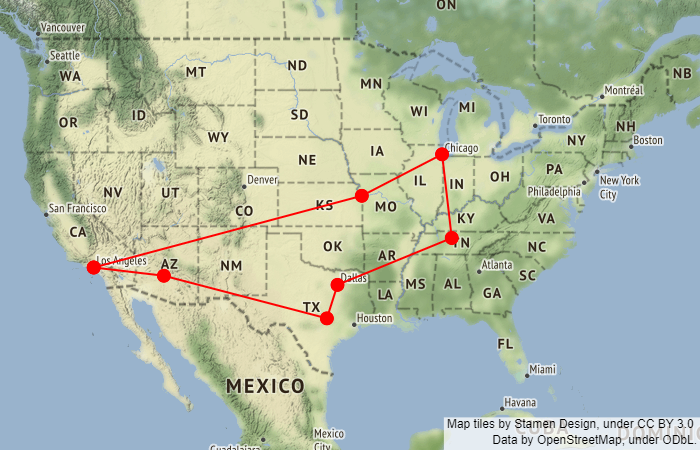

### TSP: Constraints
The solution above works well when there exist no constraints in the routes  
Current Solution: _0 -> 6 -> 3 -> 2 -> 5 -> 1 -> 4 -> 0_  
We will introduce a constraint where the salesman cannot travel from Austin -> Dallas and Dallas -> Austin

In [93]:
# Introducing Constraint
M_constraint = M.copy()
M_constraint[3,2], M_constraint[2,3] = 999999999, 999999999
solutions = tsp(M_constraint,s,V)
display(solutions[-1])

"""
Notes:
* The total cost of the optimal route solution is 4189 miles
* Solution: 0 -> 6 -> 3 -> 5 -> 1 -> 4 -> 2 -> 0
* Solution Cost: 4484.289
""";

[[6, 3, 5, 1, 4, 2], 4484.2387726575125]

### TSP: Constraints Visual

In [94]:
optimal_route = solutions[-1][0].copy()
optimal_route.insert(0,0)
optimal_route.append(0)
opt_lat_input = [geo_locations[cities[i]][0] for i in optimal_route]
opt_lon_input = [geo_locations[cities[i]][1] for i in optimal_route]

fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lat = opt_lat_input,
    lon = opt_lon_input,
    marker = {'size': 15,'color':'red'}))

fig.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'center': {'lat': us_center[0], 'lon': us_center[1]},
        'style': "stamen-terrain",
        'center': {'lat': us_center[0], 'lon': us_center[1]},
        'zoom': 3})

fig.show()

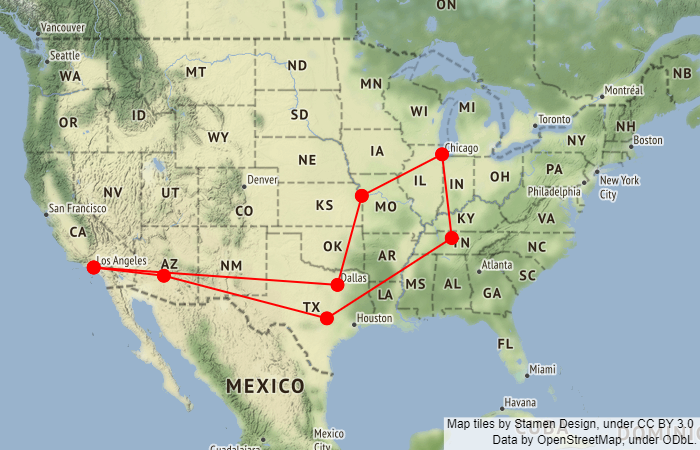